# [선형회귀분석 실습 4: 실전]

## 모듈 불러오기

In [1]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

import pylab

from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#plt.rc('font', family='Malgun Gothic')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

## 데이터 불러오기

### Toyota Corolla Data
### 중고차 가격(Price)를 예측하기 위한 예측모델 학습

In [4]:
data = pd.read_csv('Data/ToyotaCorolla.csv')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## 데이터 전처리하기
### 1. 예측에 필요하지 않은 변수 제거

In [21]:
X = pd.DataFrame(data)
X = X.drop(['Price','Id','Model','Fuel_Type'],axis=1)
Y = pd.DataFrame(data['Price'])

X.head()

data_ = pd.concat([X,Y],axis=1)
train_data, test_data = train_test_split(data_,test_size=0.3,random_state=55)


In [53]:
lm = sm.OLS(train_data['Price'], train_data.drop('Price',axis=1))
lm_trained = lm.fit()
display(lm_trained.summary())
test_pred = lm_trained.predict(test_data.drop('Price',axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     375.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:18:50   Log-Likelihood:                -8436.6
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     974   BIC:                         1.709e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -114.9816      4.017    -28.624      0.000    -122.865    -107.099
Mfg_Month          -93.2776     10.543     -8.848      0.000    -113.966     -72.589
Mfg_Year            -2.1563      0.848     -2.542      0.011      -3.821      -0.492
KM                  -0.0191      0.001    -15.524      0.000      -0.021      -0.017
HP                  18.5371      2.843      6.519      0.000      12.957      24.117
Met_Color         -103.0730     79.112     -1.303      0.193    -258.322      52.176
Automatic          195.8010    148.789      1.316      0.188     -96.183     487.785
cc                  -0.1373      0.076     -1.803      0.072      -0.287       0.012
Doors              -15.6624     41.785     -0.375      0.708     -97.662      66.337
Cylinders           -0.0389      0.002    -17.095      0.000      -0.043      -0.034
Gears              204.1533    187.482      1.089      0.276    -163.762     572.069
Quarterly_Tax        1.3659      1.478      0.924      0.356      -1.535       4.267
Weight              18.8386      1.431     13.165      0.000      16.030      21.647
Mfr_Guarantee      312.9440     77.283      4.049      0.000     161.283     464.605
BOVAG_Guarantee    679.1090    131.481      5.165      0.000     421.090     937.128
Guarantee_Period    76.7554     13.590      5.648      0.000      50.086     103.425
ABS               -414.1815    131.349     -3.153      0.002    -671.942    -156.421
Airbag_1          -325.9419    249.517     -1.306      0.192    -815.595     163.711
Airbag_2           161.7414    135.909      1.190      0.234    -104.967     428.450
Airco               85.6836     92.377      0.928      0.354     -95.598     266.965
Automatic_airco   2148.0897    193.528     11.100      0.000    1768.310    2527.870
Boardcomputer     -375.3768    123.072     -3.050      0.002    -616.893    -133.861
CD_Player          277.0970    104.093      2.662      0.008      72.825     481.369
Central_Lock      -246.8519    143.376     -1.722      0.085    -528.214      34.510
Powered_Windows    663.8474    143.354      4.631      0.000     382.530     945.165
Power_Steering    -397.8024    288.134     -1.381      0.168    -963.237     167.632
Radio              -47.4025     53.746     -0.882      0.378    -152.875      58.070
Mistlamps          -45.0181    114.003     -0.395      0.693    -268.738     178.702
Sport_Model        210.4336     91.325      2.304      0.021      31.217     389.650
Backseat_Divider   -85.2049    128.238     -0.664      0.507    -336.860     166.450
Metallic_Rim       236.9277     97.772      2.423      0.016      45.059     428.797
Radio_cassette     -47.4025     53.746     -0.882      0.378    -152.875      58.070
Tow_Bar           -100.1751     83.535     -1.199      0.231    -264.104      63.753
=======================

In [47]:
train_data_new = train_data.drop(['Doors','Gears','Quarterly_Tax','Airbag_1',
                                  'Airbag_2','Airco','Radio','Mistlamps',
                                  'Backseat_Divider','Radio_cassette',
                                  'Tow_Bar','Automatic'],axis=1)
test_data_new = test_data.drop(['Doors','Gears','Quarterly_Tax','Airbag_1',
                                  'Airbag_2','Airco','Radio','Mistlamps',
                                  'Backseat_Divider','Radio_cassette',
                                  'Tow_Bar','Automatic'],axis=1)

In [49]:
lm_new = sm.OLS(train_data_new['Price'],train_data_new.drop('Price',axis=1))
lm_new_trained = lm_new.fit()
#display(lm_new_trained.summary())
test_pred_new = lm_new_trained.predict(test_data_new.drop('Price',axis=1))

In [51]:
test_mse = mean_squared_error(test_data['Price'], test_pred)
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_pred))
test_mae = mean_absolute_error(test_data['Price'], test_pred)
test_mape = mean_absolute_percentage_error(test_data['Price'], test_pred)

test_mse_new = mean_squared_error(test_data_new['Price'], test_pred_new)
test_rmse_new = np.sqrt(mean_squared_error(test_data_new['Price'], test_pred_new))
test_mae_new = mean_absolute_error(test_data_new['Price'], test_pred_new)
test_mape_new = mean_absolute_percentage_error(test_data_new['Price'], test_pred_new)

In [52]:
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new))

Testing MSE: 1788162.286 → 1817967.553
Testing RMSE: 1337.222 → 1348.320
Testing MAE: 878.352 → 881.218
Testing MAPE: 9.200 → 9.235


## 모델링

### 학습 데이터를 이용하여 선형회귀모델 학습

<AxesSubplot:>

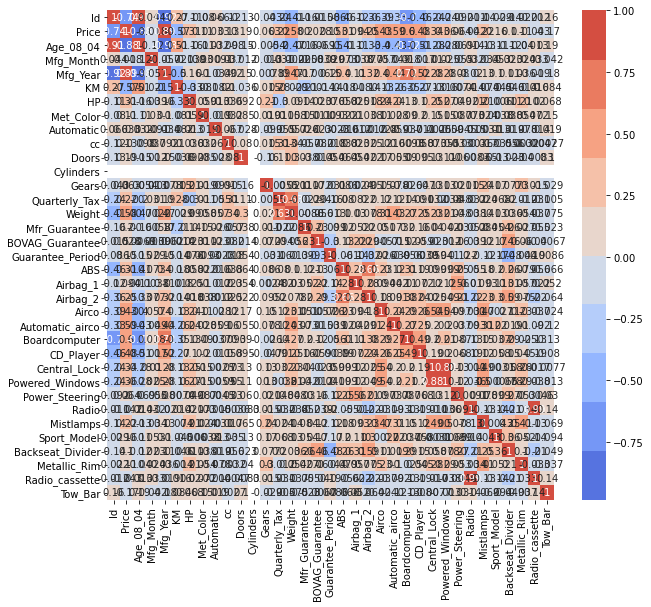

In [54]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data.corr())

### 모델 학습 결과 (Summary) 확인

## 예측성능 평가

### 1. 학습 데이터셋에 대한 예측성능 평가
MSE, RMSE, MAE, MAPE 계산하여 성능 확인

In [44]:
test_mse = mean_squared_error(test_data['Price'],test_pred)

NameError: name 'test_pred' is not defined

### 2. 테스트 데이터셋에 대한 예측성능 평가
MSE, RMSE, MAE, MAPE 계산하여 성능 확인

## 변수 선택

### 1-1. 선형회귀모델에서 유의하지 않은 변수가 있다면 제거

### 1-2. 변수 제거 후 모델 학습 결과 확인

### 1-3. 변수 제거 후 모델 예측성능 (학습/테스트) 확인

### 2-1. 상관계수가 높은 설명변수들이 있다면 하나의 변수만 선택

### 2-2. 변수 제거 후 모델 학습 결과 확인

### 2-3. 변수 제거 후 모델 예측성능 (학습/테스트) 확인

## 변수 변환

### 반응변수($\mathbf{y}$)에 로그 / 제곱근 등의 변환 적용하고 모델 성능 확인